# HW2 - Gradient Descent 

In [ ]:
    # Name : Kumar Shubham
    # G    : G01402581
    # Netid: kfnu

Agenda:

Run experiments where you learn logistic regression models on the training set when using three different bounds on the maximum number of iterations: 
(1) ten thousand, (2) one hundred thousand, and (3) one million.

In your writeup, report all four of the following:

(1) the cross-entropy error on the training set
(2) the classification error on the training data 
(3) an estimate of the classification error on the test data obtained using Miner 
(4) the time it took to train your model. 
(5) In your report, discuss the generalization properties 
(the difference between training and test set classification errors) of the model.
How does this relate to the cross-entropy error on the training set?

In [124]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Train and test your model on the "Cleveland" dataset, which you can learn more about here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Data Dictionary:
    
cp: chest pain type 
    -- Value 1: typical angina 
    -- Value 2: atypical angina 
    -- Value 3: non-anginal pain 
    -- Value 4: asymptomatic

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    
trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
    
chol: serum cholestoral in mg/dl
    
restecg: resting electrocardiographic results 
    -- Value 0: normal 
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
exang: exercise induced angina (1 = yes; 0 = no)
    
oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment 
    -- Value 1: upsloping 
    -- Value 2: flat 
    -- Value 3: downsloping
        
ca: number of major vessels (0-3) colored by flourosopy thal: 
    3 = normal; 
    6 = fixed defect; 
    7 = reversable defect num: diagnosis of heart disease (angiographic disease status) 
        -- Value 0: < 50% diameter narrowing 
        -- Value 1: > 50% diameter narrowing 

In [125]:
def csv_to_df(file_name):
    return pd.read_csv(file_name,delimiter=',',quotechar='"',delim_whitespace=False,encoding='utf-8')

In [126]:
train_filename = "cleveland-train.csv"
test_filename = "cleveland-test.csv"

In [127]:
train_df = csv_to_df(train_filename)
test_df = csv_to_df(test_filename)

In [128]:
train_df = train_df.rename(columns={'heartdisease::category|-1|1':'heartdisease'}).replace(-1,0)

In [129]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1


In [130]:
print(train_df.shape)
print(test_df.shape)

(152, 14)
(145, 13)


In [131]:
train_df['heartdisease'].value_counts()

0    86
1    66
Name: heartdisease, dtype: int64

<AxesSubplot:>

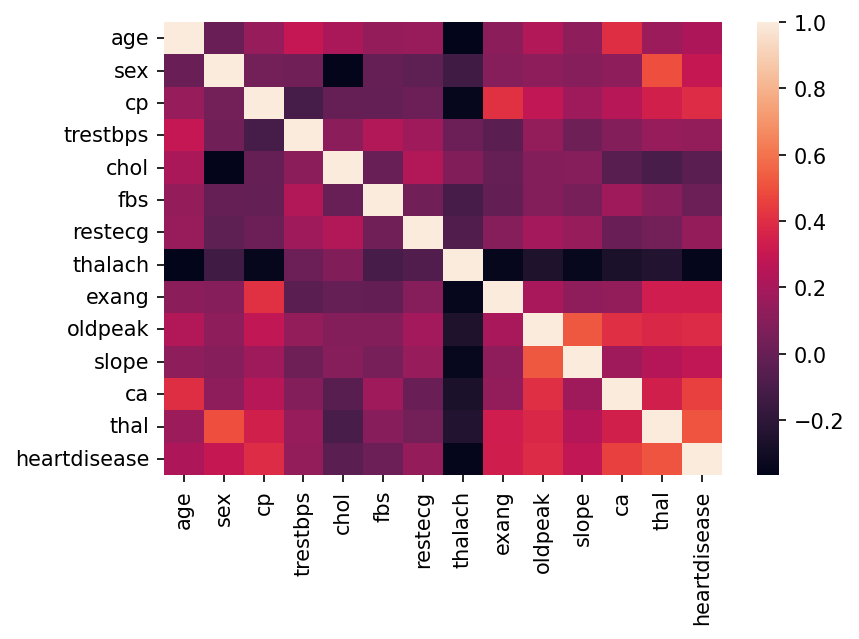

In [132]:
plt.figure(dpi=150)
sns.heatmap(train_df.corr(),annot=False)

In [167]:
X = train_df.drop('heartdisease', axis = 1).values
y = [int(i) for i in train_df['heartdisease']]

In [168]:
test = test_df.values

In [169]:
print(X.shape)
print(len(y))

(152, 13)
152


In [170]:
scaler = StandardScaler()

In [171]:
X_std_scaler = scaler.fit_transform(X)

In [172]:
test_scaled = scaler.transform(test)

In [211]:
print(X_std_scaler.shape)
#print(X_test.shape)

(152, 13)


Task 1

is to encode a gradient descent algorithm for learning a logistic regression model. 
Your function should take as input a matrix X, where each row corresponds to a training example, and a column vector y where each row corresponds to a label, and return the learned weight vector w (which should have one more element than each training example, with the convention that this first element represents the intercept), 

the cross-entropy error, and 
the classification (0/1) error it achieved on the training set. 
Use a learning rate eta = 10^{-5} and automatically terminate the algorithm if the magnitude of each term in the gradient is below 10^{-3} at any step.

In [118]:
#Sigmoid function
def measure_sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [232]:
def fit_predict_logistic_regression(X, y, iterations, eta, tol):
    r,c=X.shape
    start_time = time.time()
    
    cross_entropy_error = 0
    classification_error = 0
    num_iter = 0

    #Add a bias term to X and initialize weight vector
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    w = np.zeros(X.shape[1])
    
    #Gradient descent loop
    for i in range(iterations):
        z=X.dot(w)
        y_pred = measure_sigmoid(z)
        grad = X.T.dot(y_pred-y)/X.shape[0]
        
        for j in range(X.shape[0]):
            cross_entropy_error += -(np.dot(y[j],np.log(y_pred[j])) + np.dot((1-y[j]),np.log(1-y_pred[j])))
            if y_pred[j] >= 0.5:
                y_pred_temp = 1
            else:
                y_pred_temp = 0
            if y_pred_temp != y[j]:
                classification_error += 1
        
        classification_error /= X.shape[0]
        cross_entropy_error /= X.shape[0]
        #Check convergence
        if np.all(np.abs(grad) < tol):
            break

        # Update weights
        w -= eta * grad
        num_iter += 1
        
    #Predict using learned weight vector
    y_pred_test = (X.dot(w) > 0).astype(int)
    end_time = time.time()
    return w,accuracy_score(y_pred_test, y),cross_entropy_error,classification_error,(end_time - start_time),num_iter

In [233]:
import time
eta=1e-5
tol=1e-3
i = lw = sc = cost = cerr = tt = et = []
for max_iters in [10000, 100000, 1000000]:
    print(f"Maximum number of iterations: {max_iters}")
    w, score, cross_entropy_error, classification_error, train_time, iterations = fit_predict_logistic_regression(X_std_scaler, y, max_iters ,eta,tol)
    print(f"Training Accuracy: {score:.4f}")
    print(f"Learned weight vector: {w.ravel()}")
    print(f"Training set cross-entropy error: {float(cross_entropy_error):.4f}")
    print(f"Training set classification error: {classification_error:.4f}")
    print(f"Training time: {train_time:.4f}s")
    i.append(iterations)
    lw.append(w)
    sc.append(score)
    cost.append(cross_entropy_error)
    cerr.append(classification_error)
    tt.append(train_time)

Maximum number of iterations: 10000
Training Accuracy: 0.8092
Learned weight vector: [-0.00649736  0.01030669  0.01419356  0.01884358  0.00659612 -0.00200029
  0.00044416  0.00682121 -0.01682467  0.01597742  0.01857863  0.01337991
  0.02180836  0.02457978]
Training set cross-entropy error: 0.6681
Training set classification error: 0.1921
Training time: 12.5578s
Maximum number of iterations: 100000
Training Accuracy: 0.8026
Learned weight vector: [-0.05813708  0.06722947  0.10869183  0.14176046  0.0521538  -0.01518892
 -0.00623456  0.05288535 -0.12008387  0.11753027  0.13235318  0.09359056
  0.16798462  0.18626352]
Training set cross-entropy error: 0.5272
Training set classification error: 0.1987
Training time: 119.2358s
Maximum number of iterations: 1000000
Training Accuracy: 0.8224
Learned weight vector: [-0.27534348  0.04495877  0.32283574  0.42037741  0.24688949  0.00254886
 -0.16332289  0.22243271 -0.26296924  0.29587714  0.27592051  0.19396054
  0.59250954  0.51957026]
Training se

In [192]:
test = np.hstack([np.ones((test_scaled.shape[0], 1)), test_scaled])
test_pred = (test.dot(w) > 0).astype(int)

In [193]:
test_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [194]:
len(test_pred)

145

In [195]:
test_pred= np.where(test_pred==0,-1,1)
print(test_pred)

[-1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1
 -1 -1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1
 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1
  1 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1
 -1]


In [202]:
#accuracy on miner: 0.89
print("miner error on 1 million iteration with eta 1e-5 and tolerance 1e-3", 1-0.89)

miner error on 1 million iteration with eta 1e-5 and tolerance 1e-3 0.10999999999999999


Task 2 : 

Now train and test a logistic regression model using whichever library you used for Homework 1. Compare the results with the best ones you achieved and also compare the time taken to achieve the results.

In [227]:
start_time = time.time()
hw1_model = LogisticRegression()
hw1_model.fit(X_std_scaler, y)
end_time = time.time()
print(end_time - start_time)
#Train Error
hw_train_pred = hw1_model.predict(X_std_scaler)
training_error = np.mean(hw_train_pred!=y)

#Test Predict
hw_y_pred = hw1_model.predict(test_scaled)
hw1_test_data = np.where(hw_y_pred==0,-1,1)
#write_pred=open("gradientdescentoutput6.csv", "w")
#write_pred.writelines("%s\n" % i for i in hw1_test_data)
#write_pred.close()

#Miner test accuracy on HW1 logistic regression:  0.78

0.10372495651245117


In [228]:
training_error

0.18421052631578946

Task 3: 

Experiment with the learning rate eta (you may want to start by trying different orders of magnitude), this time using a tolerance (how close to zero you need each element of the gradient to be in order to terminate) of 10^{-6}. Report the results in terms of number of iterations until the algorithm terminates, and also the final cross-entropy error. 

In [230]:
#Experimenting with different eta's
import time
tol=1e-6
i = lw = sc = cost = cerr = tt = et = ca = []
for eta in [1e-2,1e-3,1e-4,1e-5]:
    print(f"Learning rate: {eta}")
    w,score,cross_entropy_error,classification_error,train_time,iterations,converged_at = fit_predict_logistic_regression(X_std_scaler, y, 1000000 ,eta=eta,tol=tol)
    print(f"number of iterations: {iterations}")
    print(f"Training Accuracy: {score:.4f}")
    print(f"Learned weight vector: {w.ravel()}")
    print(f"Training set cross-entropy error: {float(cross_entropy_error):.4f}")
    print(f"Training set classification error: {classification_error:.4f}")
    print(f"Training time: {train_time:.4f}s")
    print(f"Coverged at iteration: {converged_at}")
    et.append(eta)
    i.append(iterations)
    lw.append(w)
    sc.append(score)
    cost.append(cross_entropy_error)
    cerr.append(classification_error)
    tt.append(train_time)
    ca.append(converged_at)

Learning rate: 0.0001


KeyboardInterrupt: 

### Note: I intentionally interrupted the above code as it ran second time by mistake and it is taking a lot of time in my window system. Before re-running it, I took a copy of the result which is below:

In [242]:
'''
Learning rate: 0.01
number of iterations: 23221
Training Accuracy: 0.8289
Learned weight vector: [-0.35027354 -0.16895917  0.43466055  0.5515073   0.45320421  0.11750063
 -0.32456248  0.32087401 -0.30951214  0.30614969  0.13299169  0.2729831
  0.9490317   0.51505415]
Training set cross-entropy error: 0.4101
Training set classification error: 0.1722
Training time: 15.4529s
    
Learning rate: 0.001
number of iterations: 232251
Training Accuracy: 0.8289
Learned weight vector: [-0.35027354 -0.16895916  0.43466055  0.5515073   0.45320421  0.11750063
 -0.32456248  0.32087401 -0.30951214  0.30614969  0.13299169  0.27298309
  0.9490317   0.51505415]
Training set cross-entropy error: 0.4101
Training set classification error: 0.1722
Training time: 152.8261s
    
Learning rate: 0.0001
number of iterations: 1000000
Training Accuracy: 0.8289
Learned weight vector: [-0.35023312 -0.16507692  0.43065651  0.55006422  0.44999373  0.11413723
 -0.32338192  0.32101006 -0.30811435  0.30503954  0.13722243  0.27012399
  0.94337196  0.5176516 ]
Training set cross-entropy error: 0.4101
Training set classification error: 0.1722
Training time: 656.8303s
    
Learning rate: 1e-05
number of iterations: 1000000
Training Accuracy: 0.8224
Learned weight vector: [-0.27534348  0.04495877  0.32283574  0.42037741  0.24688949  0.00254886
 -0.16332289  0.22243271 -0.26296924  0.29587714  0.27592051  0.19396054
  0.59250954  0.51957026]
Training set cross-entropy error: 0.4195
Training set classification error: 0.1788
Training time: 656.9471s
'''

'\nLearning rate: 0.01\nnumber of iterations: 23221\nTraining Accuracy: 0.8289\nLearned weight vector: [-0.35027354 -0.16895917  0.43466055  0.5515073   0.45320421  0.11750063\n -0.32456248  0.32087401 -0.30951214  0.30614969  0.13299169  0.2729831\n  0.9490317   0.51505415]\nTraining set cross-entropy error: 0.4101\nTraining set classification error: 0.1722\nTraining time: 15.4529s\n    \nLearning rate: 0.001\nnumber of iterations: 232251\nTraining Accuracy: 0.8289\nLearned weight vector: [-0.35027354 -0.16895916  0.43466055  0.5515073   0.45320421  0.11750063\n -0.32456248  0.32087401 -0.30951214  0.30614969  0.13299169  0.27298309\n  0.9490317   0.51505415]\nTraining set cross-entropy error: 0.4101\nTraining set classification error: 0.1722\nTraining time: 152.8261s\n    \nLearning rate: 0.0001\nnumber of iterations: 1000000\nTraining Accuracy: 0.8289\nLearned weight vector: [-0.35023312 -0.16507692  0.43065651  0.55006422  0.44999373  0.11413723\n -0.32338192  0.32101006 -0.3081143

In [196]:
write_pred=open("gradientdescentoutput.csv", "w")
write_pred.writelines("%s\n" % i for i in test_pred)
write_pred.close()